# Tutorial 2: Part 3
Objectives:
- Build a transfer line and compute the TWISS functions from given initial conditions.
- Matching.

**Transfer lines: periodic and initial conditions**

1. Build a tranfer line of 10 m with 4 quadrupoles of L=0.4 m (centered at 2,4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1, 0.1 $m^{-2}$. Can you find a periodic solution?

<div>
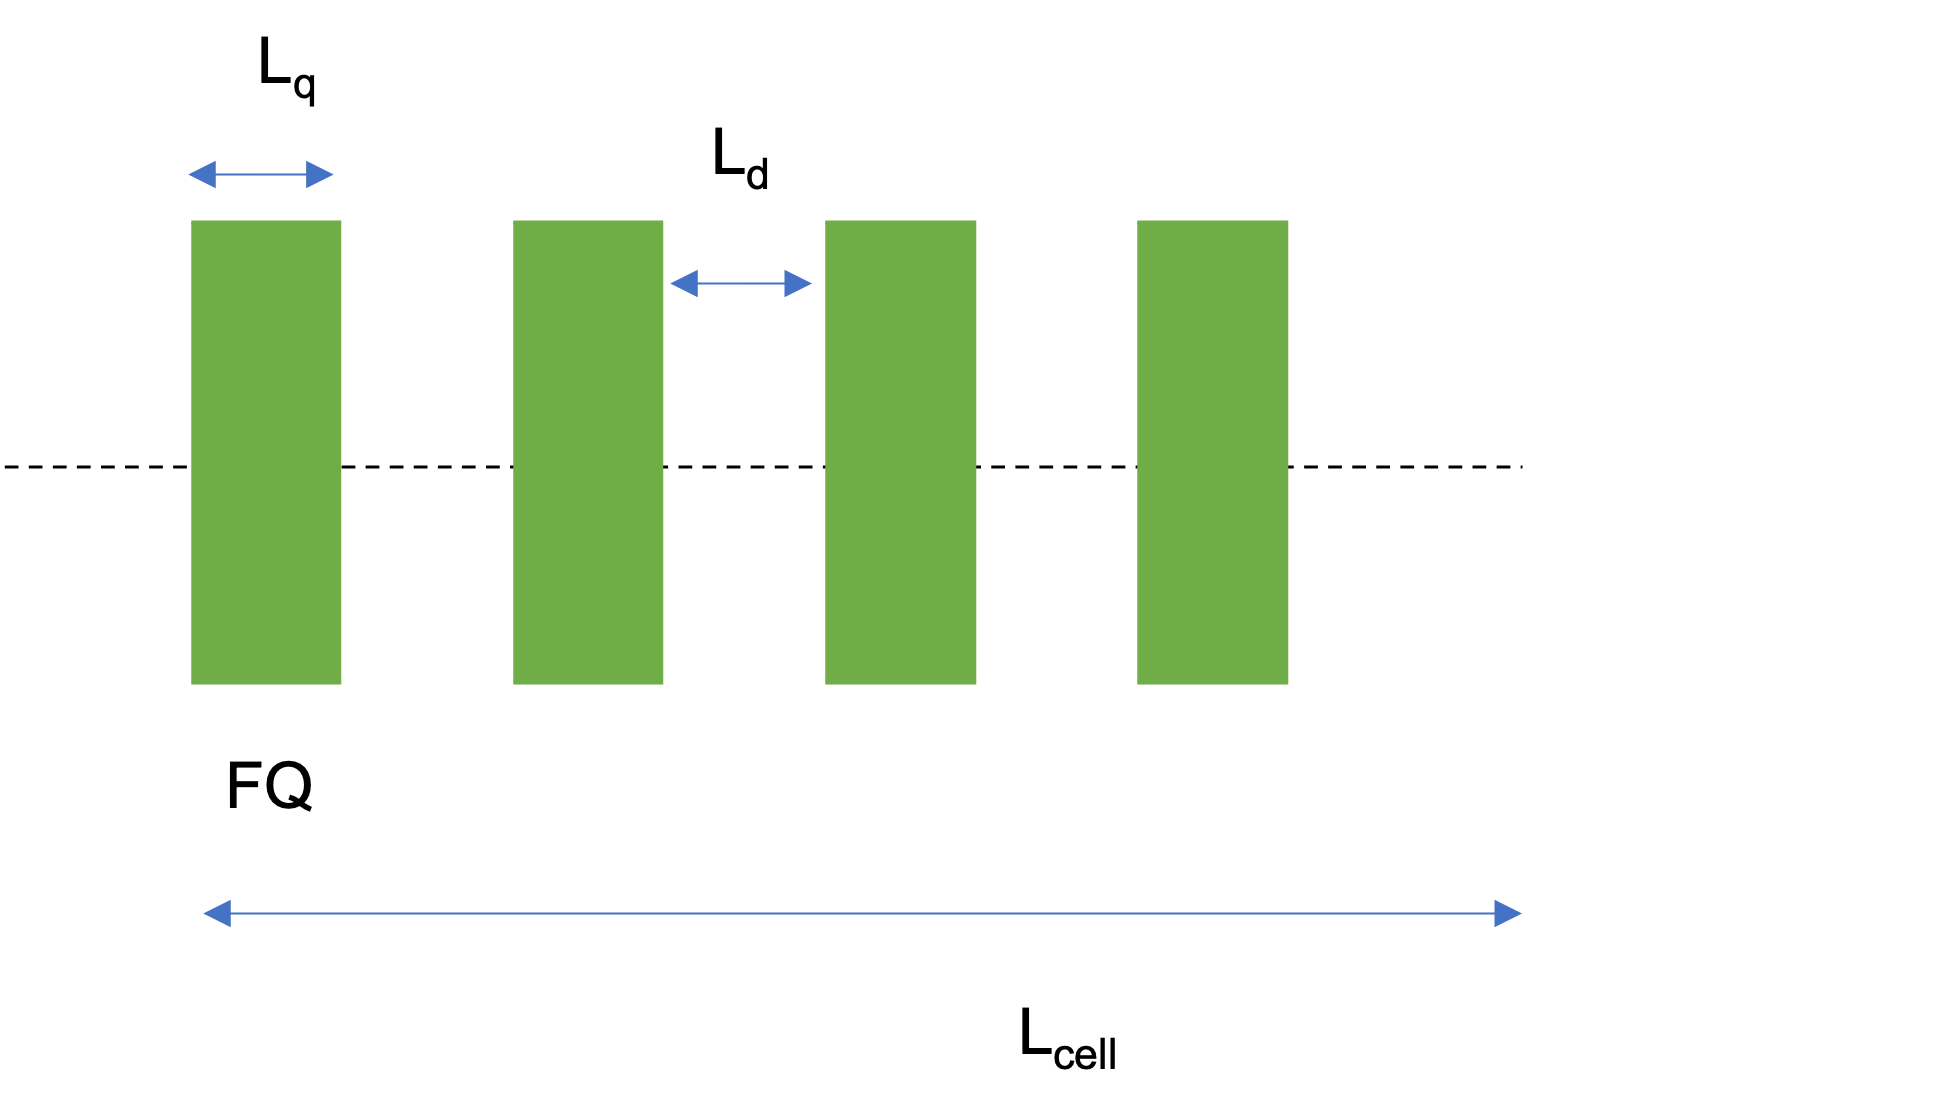
</div>

2. Can you find an initial condition (IC) solution starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0)?


3. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)

**Tranfer lines: the matching**

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2,0,1,0) at the end.


        MATCH, SEQUENCE=myCell, betx=1, bety=2;
        constraint, betx=2, range=#e;
        constraint, alfx=0, range=#e;
        constraint, bety=1, range=#e;
        constraint, alfy=0, range=#e;
        VARY, NAME= myK1, STEP=0.00001;
        VARY, NAME= myK2, STEP=0.00001;
        VARY, NAME= myK3, STEP=0.00001;
        VARY, NAME= myK4, STEP=0.00001;
        JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
        ENDMATCH;

5. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$). Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?


6. Consider that the quadrupole have an excitation current factor of 100 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the mgnetic field at the poles of the four quadrupoles after matching. (HINT: assume a linear regime and use a dimensional approach).



In [107]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx
import pandas as pd

In [108]:
myMad = Madx(stdout=True)

1. Build a tranfer line of 10 m with 4 quadrupoles of L=0.4 m (centered at 2,4,6 and 8 m). With K1 respectively of 0.1, 0.1, 0.1 𝑚−2. Can you find a periodic solution? 

In [109]:
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

!Magnet properties
quadrupoleLenght=0.1;
cellLength=10;

myK1=.1;// m^-2
myK2=.1;// m^-2
myK3=.1;// m^-2
myK4=.1;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

Q: quadrupole, L=quadrupoleLenght;

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=center, L=cellLength;
myStart: marker, at=0;
q1: Q,K1:=myK1, at=2;
q2: Q,K1:=myK2, at=4;
q3: Q,K1:=myK3, at=6;
q4: Q,K1:=myK4, at=8;
myEnd: marker, at=10;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=2;

! *********************************************************************
! Activate the sequence
! *********************************************************************

use, sequence=myCell;

! *********************************************************************
! Twiss
! *********************************************************************

twiss;
'''
myMad.input(myString);

**Conclusions**: the periodic solution does not exist for all focusing quadrupoles.

2. Can you find a IC solution strting from (𝛽𝑥, 𝛼𝑥, 𝛽𝑦, 𝛼𝑦) = (1 m, 0, 2 m, 0)?. 

    
3. What is the final optical conditions ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)? .

In [110]:
myString='''
twiss,betx=1, bety=2;
'''
myMad.input(myString);

In [111]:
myDFTable1=myMad.table['twiss'].dframe()
myDFTable1

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000,0.174584,3.901250,-0.975000,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.197436,-1.998042,0.177770,4.105284,-1.066023,0.126963,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,16.257422,-3.823004,0.210905,10.034826,-2.054789,0.174794,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,17.014863,-3.748881,0.211862,10.461302,-2.211390,0.176348,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,34.454604,-5.429930,0.224364,20.897199,-3.281187,0.196856,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,35.514267,-5.163174,0.224819,21.580410,-3.553206,0.197606,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,57.945783,-6.642887,0.231487,37.361845,-4.752813,0.208263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,59.223333,-6.128361,0.231758,38.356732,-5.199368,0.208684,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# These are the gradients
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1    0.1
q2    0.1
q3    0.1
q4    0.1
dtype: float64

<IPython.core.display.Javascript object>


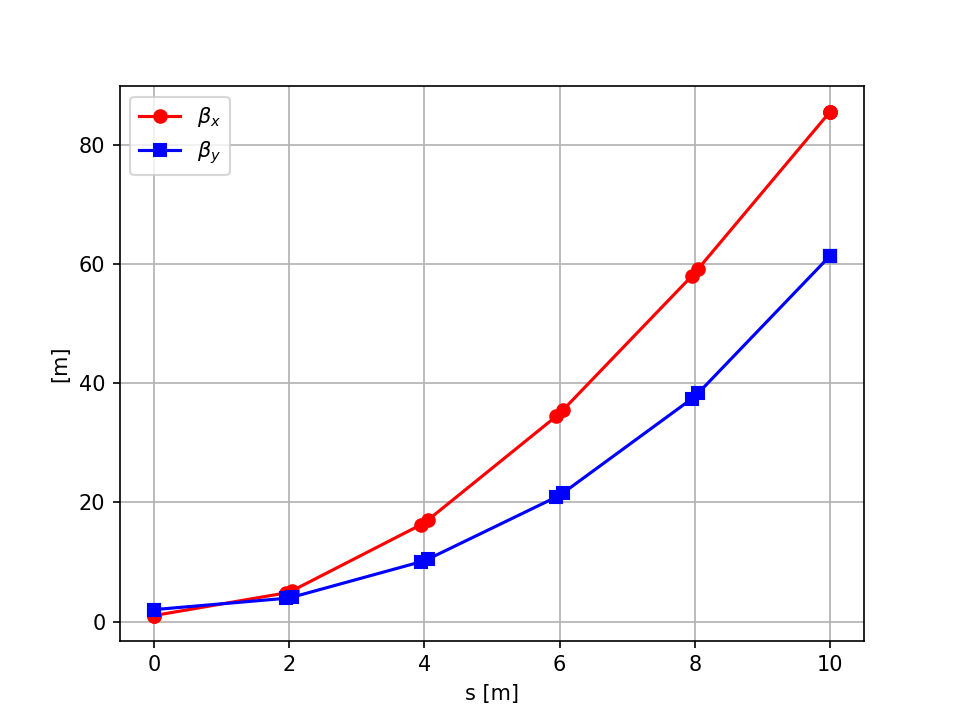

Text(0, 0.5, '[m]')

In [113]:
%matplotlib notebook
aux=myDFTable1
plt.plot(aux['s'],aux['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux['s'],aux['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# First matching

4. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) match the line to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$)= (2 m,0,1 m,0) at the end.

In [114]:
myString='''
savebeta, label=betaEnd, place=#e;

MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=2, range=#e;
constraint, alfx=0, range=#e;
constraint, bety=1, range=#e;
constraint, alfy=0, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;

twiss,betx=1, bety=2, file="./firstpart/AfterMatching1.txt";
'''
myMad.input(myString);


In [101]:
myDFTable2=myMad.table['twiss'].dframe()
myDFTable2

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000e+00,0.174584,3.901250,-9.750000e-01,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.236870,-2.403497e+00,0.177762,4.074009,-7.486915e-01,0.126974,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,19.041695,-4.862201e+00,0.208229,8.301838,-1.476482e+00,0.179943,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,18.765565,7.562999e+00,0.209062,9.169430,-7.387900e+00,0.181787,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,1.222113,1.670396e+00,0.273993,59.125686,-1.890487e+01,0.194788,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,0.989436,7.088986e-01,0.288652,58.865109,2.145128e+01,0.195055,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,3.777696,-2.176404e+00,0.568250,5.631485,6.566417e+00,0.211694,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,3.901250,9.750000e-01,0.572339,4.802500,1.950000e+00,0.214797,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
aux=myDFTable2[myDFTable2['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1   -0.676969
q2    6.545144
q3   -6.802510
q4    8.243978
dtype: float64

<IPython.core.display.Javascript object>


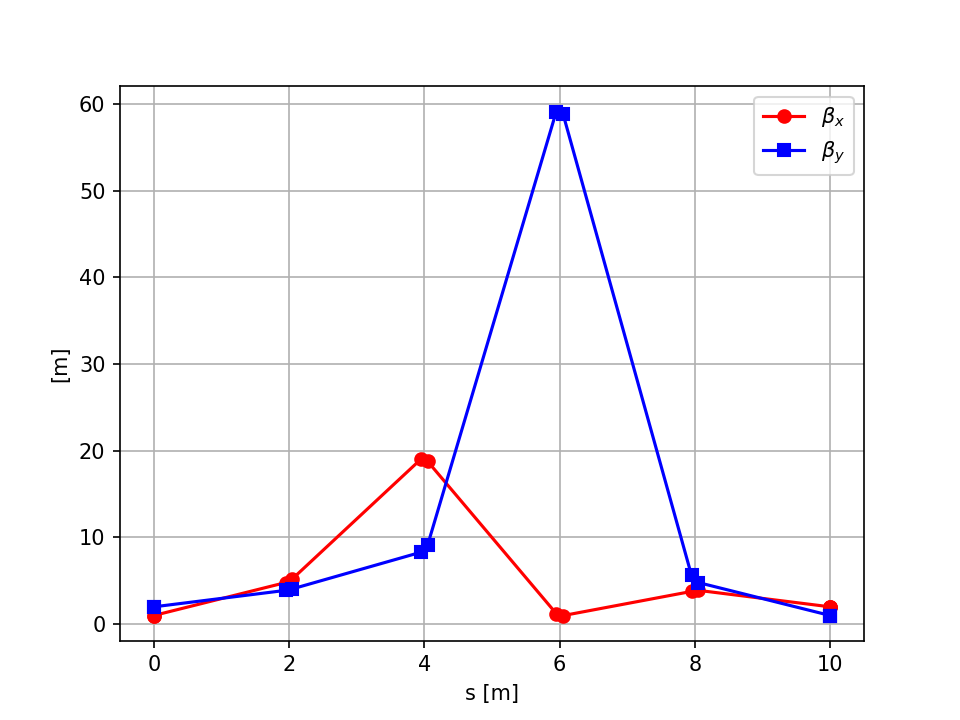

Text(0, 0.5, '[m]')

In [116]:
%matplotlib notebook
aux=myDFTable2
plt.plot(aux['s'],aux['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux['s'],aux['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

# Second matching

5. Starting from ($\beta_x$, $\alpha_x$, $\beta_y$, $\alpha_y$) = (1 m, 0, 2 m, 0) and the gradient obtained with previous matching, match to ($\beta_x^{end}$, $\alpha_x^{end}$, $\beta_y^{end}$, $\alpha_y^{end}$). Can you find back K1 respectively of 0.1,0.1,0.1,0.1 $m^{-2}$?.

In [117]:
myString='''
MATCH, SEQUENCE=myCell, betx=1, bety=2;
constraint, betx=betaEnd->betx, range=#e;
constraint, alfx=betaEnd->alfx, range=#e;
constraint, bety=betaEnd->bety, range=#e;
constraint, alfy=betaEnd->alfy, range=#e;
VARY, NAME= myK1, STEP=0.00001;
VARY, NAME= myK2, STEP=0.00001;
VARY, NAME= myK3, STEP=0.00001;
VARY, NAME= myK4, STEP=0.00001;
JACOBIAN, CALLS=50, TOLERANCE=1e-20;//method adopted
ENDMATCH;
twiss,betx=1, bety=2;
'''
myMad.input(myString);

In [118]:
myDFTable3=myMad.table['twiss'].dframe()
myDFTable3

,name,keyword,s,betx,alfx,mux,bety,alfy,muy,x,...,sig54,sig55,sig56,sig61,sig62,sig63,sig64,sig65,sig66,n1
#s,mycell$start:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mystart,mystart:1,marker,0.00,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,1.95,4.802500,-1.950000,0.174584,3.901250,-0.975000,0.122985,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,q1:1,quadrupole,2.05,5.866198,-9.129213,0.177646,3.614683,3.719518,0.127136,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,3.95,92.460760,-36.446872,0.190645,4.296110,-4.078164,0.547064,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,4.05,91.715372,43.684821,0.190815,5.583809,-9.167596,0.550361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,5.95,0.867330,4.129938,0.224982,95.403170,-38.105752,0.563477,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,q3:1,quadrupole,6.05,0.272915,1.930413,0.258258,97.370217,18.822866,0.563641,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,7.95,55.457292,-30.974822,0.677052,39.016080,11.889837,0.568548,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,q4:1,quadrupole,8.05,59.223333,-6.128361,0.677327,38.356732,-5.199368,0.568962,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# These are the gradients
aux=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1   -12.576606
q2     8.640655
q3    -5.887835
q4     4.425736
dtype: float64

<IPython.core.display.Javascript object>


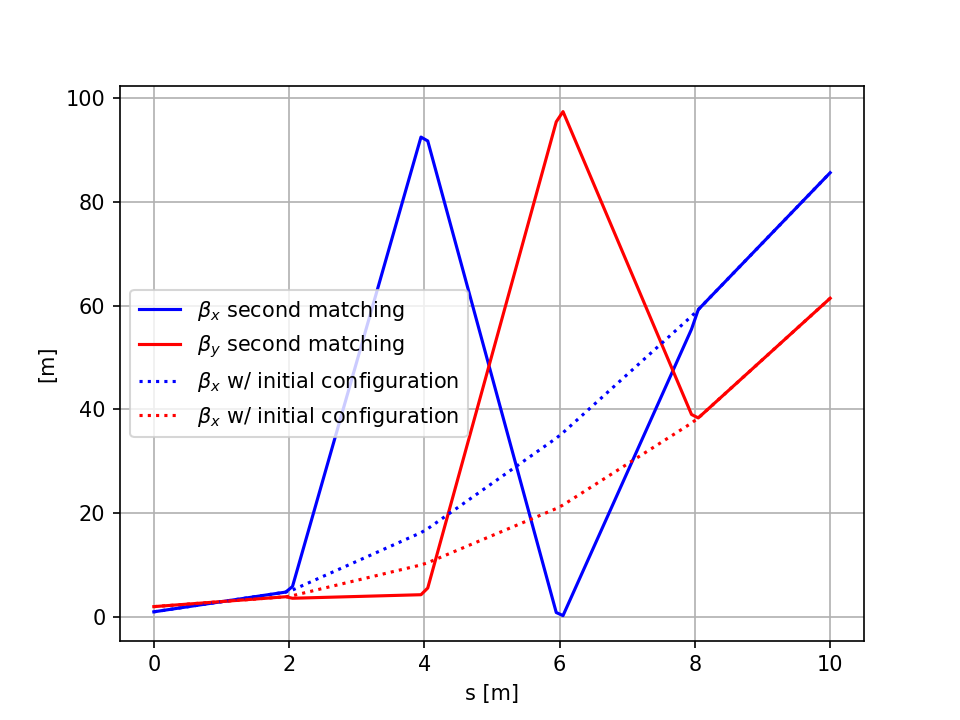

Text(0, 0.5, '[m]')

In [128]:
%matplotlib notebook
aux=myDFTable3
plt.plot(aux['s'],aux['betx'],'b', label='$\\beta_x$ second matching')
plt.plot(aux['s'],aux['bety'],'r', label='$\\beta_y$ second matching')

aux=myDFTable1
plt.plot(aux['s'],aux['betx'],':b', label='$\\beta_x$ w/ initial configuration')
plt.plot(aux['s'],aux['bety'],':r', label='$\\beta_x$ w/ initial configuration')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')

**Conclusions**:

- It is very important to observe that the second matching DOES not find the initial solution (all gradients equal to 0.1 $m^{-2}$). *The solution is NOT unique*. 


- In addition the solution that we found via the matching is very sub-optimal: it requires stronger and larger quadrupoles...

In [120]:
# These are the gradients found with the matching
aux=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1   -12.576606
q2     8.640655
q3    -5.887835
q4     4.425736
dtype: float64

In [121]:
# These are the gradients that can solve our problem
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1    0.1
q2    0.1
q3    0.1
q4    0.1
dtype: float64

# About gradients
6. Consider that the quadrupole have an excitation current factor of 10 A $m^2$ and an excitation magnetic factor of 2 T/m/A amd an aperture of 40 mm diameter. Compute the mgnetic field at the poles of the four quadrupoles after matching. (HINT: assume a linear regime and use a dimensional approach).

In [126]:
aux=myDFTable3[myDFTable3['keyword']=='quadrupole']
aux=aux['k1l']/aux['l']
aux=aux*10 #this is in A
aux*=2  #this is in T/m/A
aux*=.04 #this is in T
np.abs(aux) #these magnets are extremely difficult to be built (superconductive)

q1    10.061285
q2     6.912524
q3     4.710268
q4     3.540589
dtype: float64

In [127]:
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux=aux['k1l']/aux['l']
aux=aux*10 #this is in A
aux*=2  #this is in T/m
aux*=.04 #this is in T
np.abs(aux) #these magnets are easier to be built

q1    0.08
q2    0.08
q3    0.08
q4    0.08
dtype: float64